# Bank Case study using Random Forest

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('C:\loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.shape

(39717, 111)

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [9]:
# Null value percentage in each column
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [10]:

#columnwise Null count 
df.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
# You could find that the Columns related to the customer behaviour data cann't be collected at the time of application. 
#Hence analysing these columns could not solve 
# our business problem ,this Removing Customer Behaviour variables
df=df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
               'out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
               'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','application_type'], axis=1)

In [12]:
#columnwise Null count 
df.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 90, dtype: int64

In [13]:
# Code for dropping the columns that have high null values and are not required for further analysis
df= df.loc[:,round(100*(df.isnull().sum()/len(df.index)),2) < 80]

In [14]:
# Null value percentage in each column
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
mths_since_last_delinq        64.66
initial_list_status            0.00
total_pymnt                 

In [15]:
df =df.drop(['member_id','id','acc_now_delinq','chargeoff_within_12_mths','pymnt_plan','initial_list_status','delinq_amnt','pub_rec_bankruptcies','tax_liens','collections_12_mths_ex_med','policy_code','url','emp_title','zip_code','addr_state','title','desc'], axis=1)

In [16]:
# Verifying Null value percentage in each column
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
dti                        0.00
mths_since_last_delinq    64.66
total_pymnt                0.00
dtype: float64

In [17]:
# Removing the rows with the null values of the following column since we need to do analysis on them
df= df[~pd.isnull(df['mths_since_last_delinq'])]
df = df[~pd.isnull(df['emp_length'])]

In [18]:
# Verifying Null value percentage in each column
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

loan_amnt                 0.0
funded_amnt               0.0
funded_amnt_inv           0.0
term                      0.0
int_rate                  0.0
installment               0.0
grade                     0.0
sub_grade                 0.0
emp_length                0.0
home_ownership            0.0
annual_inc                0.0
verification_status       0.0
issue_d                   0.0
loan_status               0.0
purpose                   0.0
dti                       0.0
mths_since_last_delinq    0.0
total_pymnt               0.0
dtype: float64

In [19]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,mths_since_last_delinq,total_pymnt
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,20.00,35.0,12231.890000
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,17.94,38.0,3513.330000
16,10000,10000,10000.0,36 months,15.27%,347.98,C,C4,4 years,RENT,42000.0,Not Verified,11-Dec,Fully Paid,home_improvement,18.60,61.0,12527.150000
18,6000,6000,6000.0,36 months,11.71%,198.46,B,B3,1 year,MORTGAGE,84000.0,Verified,11-Dec,Fully Paid,medical,18.44,8.0,7167.072893
27,5000,5000,5000.0,60 months,16.77%,123.65,D,D2,2 years,RENT,50004.0,Not Verified,11-Dec,Charged Off,other,13.97,20.0,1609.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,7-Jul,Fully Paid,home_improvement,11.33,0.0,2822.969293
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,7-Jul,Fully Paid,credit_card,6.40,5.0,9913.491822
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,7-Jul,Fully Paid,debt_consolidation,2.30,0.0,5272.161128
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,7-Jul,Fully Paid,other,3.72,0.0,5174.198551


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               13690 non-null  int64  
 1   funded_amnt             13690 non-null  int64  
 2   funded_amnt_inv         13690 non-null  float64
 3   term                    13690 non-null  object 
 4   int_rate                13690 non-null  object 
 5   installment             13690 non-null  float64
 6   grade                   13690 non-null  object 
 7   sub_grade               13690 non-null  object 
 8   emp_length              13690 non-null  object 
 9   home_ownership          13690 non-null  object 
 10  annual_inc              13690 non-null  float64
 11  verification_status     13690 non-null  object 
 12  issue_d                 13690 non-null  object 
 13  loan_status             13690 non-null  object 
 14  purpose                 13690 non-null

In [21]:
#the 'int_rate' is converted from % to a numeric value
df['int_rate'] =df['int_rate'].str.replace('%', '')
df['int_rate']=df['int_rate'].astype(float)
df['int_rate']=df['int_rate'].apply(lambda x : x/100)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,mths_since_last_delinq,total_pymnt
3,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,20.00,35.0,12231.890000
4,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,17.94,38.0,3513.330000
16,10000,10000,10000.0,36 months,0.1527,347.98,C,C4,4 years,RENT,42000.0,Not Verified,11-Dec,Fully Paid,home_improvement,18.60,61.0,12527.150000
18,6000,6000,6000.0,36 months,0.1171,198.46,B,B3,1 year,MORTGAGE,84000.0,Verified,11-Dec,Fully Paid,medical,18.44,8.0,7167.072893
27,5000,5000,5000.0,60 months,0.1677,123.65,D,D2,2 years,RENT,50004.0,Not Verified,11-Dec,Charged Off,other,13.97,20.0,1609.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,7-Jul,Fully Paid,home_improvement,11.33,0.0,2822.969293
39713,8500,8500,875.0,36 months,0.1028,275.38,C,C1,3 years,RENT,18000.0,Not Verified,7-Jul,Fully Paid,credit_card,6.40,5.0,9913.491822
39714,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,7-Jul,Fully Paid,debt_consolidation,2.30,0.0,5272.161128
39715,5000,5000,650.0,36 months,0.0743,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,7-Jul,Fully Paid,other,3.72,0.0,5174.198551


In [22]:
from sklearn import preprocessing
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical =df.select_dtypes(include=['object'])
df_categorical.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,36 months,C,C1,10+ years,RENT,Source Verified,11-Dec,Fully Paid,other
4,60 months,B,B5,1 year,RENT,Source Verified,11-Dec,Current,other
16,36 months,C,C4,4 years,RENT,Not Verified,11-Dec,Fully Paid,home_improvement
18,36 months,B,B3,1 year,MORTGAGE,Verified,11-Dec,Fully Paid,medical
27,60 months,D,D2,2 years,RENT,Not Verified,11-Dec,Charged Off,other


In [23]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,0,2,10,1,4,1,14,2,9
4,1,1,9,0,4,1,14,1,9
16,0,2,13,4,4,0,14,2,4
18,0,1,7,0,0,2,14,2,7
27,1,3,16,2,4,0,14,0,9


In [24]:
# concat df_categorical with original df
df= df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,total_pymnt,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,35.0,12231.890000,0,2,10,1,4,1,14,2,9
4,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,38.0,3513.330000,1,1,9,0,4,1,14,1,9
16,10000,10000,10000.0,0.1527,347.98,42000.0,18.60,61.0,12527.150000,0,2,13,4,4,0,14,2,4
18,6000,6000,6000.0,0.1171,198.46,84000.0,18.44,8.0,7167.072893,0,1,7,0,0,2,14,2,7
27,5000,5000,5000.0,0.1677,123.65,50004.0,13.97,20.0,1609.120000,1,3,16,2,4,0,14,0,9


In [25]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               13690 non-null  int64  
 1   funded_amnt             13690 non-null  int64  
 2   funded_amnt_inv         13690 non-null  float64
 3   int_rate                13690 non-null  float64
 4   installment             13690 non-null  float64
 5   annual_inc              13690 non-null  float64
 6   dti                     13690 non-null  float64
 7   mths_since_last_delinq  13690 non-null  float64
 8   total_pymnt             13690 non-null  float64
 9   term                    13690 non-null  int32  
 10  grade                   13690 non-null  int32  
 11  sub_grade               13690 non-null  int32  
 12  emp_length              13690 non-null  int32  
 13  home_ownership          13690 non-null  int32  
 14  verification_status     13690 non-null

# Data Preparation and Model Building

In [26]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [27]:
# Putting feature variable to X
X =df.drop('loan_status',axis=1)
# Putting response variable to y
y = df['loan_status']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.

In [28]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [29]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
# Making predictions
predictions = rfc.predict(X_test)

In [31]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [32]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       609
           1       0.17      0.01      0.02       107
           2       0.93      1.00      0.96      3391

    accuracy                           0.93      4107
   macro avg       0.70      0.58      0.61      4107
weighted avg       0.92      0.93      0.92      4107



In [33]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 454    0  155]
 [   0    1  106]
 [   4    5 3382]]


In [34]:
print(accuracy_score(y_test,predictions))

0.9342585829072315


# Hyperparameter Tuning

# Tuning max_depth

In [35]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [36]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.768620,0.022554,0.044572,0.004780,2,{'max_depth': 2},0.823161,0.826291,0.822640,0.823591,...,0.823750,0.001306,4,0.823245,0.827550,0.823376,0.823399,0.823008,0.824116,0.001723
1,1.851579,0.110897,0.063151,0.009578,7,{'max_depth': 7},0.893584,0.889411,0.896192,0.893528,...,0.892413,0.002656,3,0.906209,0.902035,0.908557,0.901135,0.900483,0.903684,0.003149
2,2.607993,0.050812,0.074109,0.004977,12,{'max_depth': 12},0.920188,0.921753,0.912885,0.928497,...,0.920067,0.005193,2,0.963606,0.961388,0.959953,0.964654,0.965958,0.963112,0.002176
3,2.824466,0.094496,0.077014,0.006655,17,{'max_depth': 17},0.926969,0.923839,0.918101,0.931628,...,0.924659,0.004499,1,0.997522,0.997391,0.998304,0.997522,0.998696,0.997887,0.000518


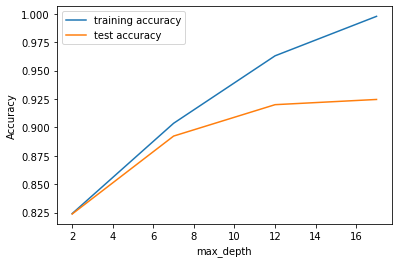

In [37]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Tuning n_estimators

In [38]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [39]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.195839,0.024766,0.049284,0.010454,100,{'n_estimators': 100},0.859677,0.857590,0.864371,0.856994,...,0.859751,0.002599,3,0.866293,0.859510,0.868249,0.857180,0.860702,0.862387,0.004192
1,6.101052,0.484583,0.250356,0.026881,500,{'n_estimators': 500},0.864371,0.858633,0.861242,0.858559,...,0.860586,0.002140,1,0.867597,0.861336,0.867728,0.860050,0.863962,0.864135,0.003145
2,10.690721,0.474381,0.414536,0.010820,900,{'n_estimators': 900},0.860720,0.859155,0.859677,0.860125,...,0.859647,0.000749,4,0.865380,0.861075,0.866423,0.859528,0.862658,0.863013,0.002579
3,16.114825,0.769178,0.601738,0.014605,1300,{'n_estimators': 1300},0.861242,0.858633,0.861242,0.856472,...,0.859751,0.001921,2,0.865119,0.862249,0.867597,0.858224,0.864615,0.863561,0.003163


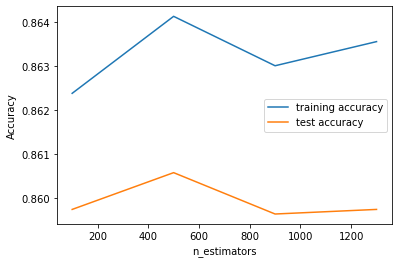

In [40]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning max_features


In [41]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [42]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.173261,0.033241,0.052428,0.003959,4,{'max_features': 4},0.854982,0.860720,0.860198,0.862735,...,0.860378,0.002936,3,0.860944,0.864336,0.864075,0.863180,0.867745,0.864056,0.002197
1,1.939822,0.060927,0.046567,0.003347,8,{'max_features': 8},0.881586,0.881064,0.880021,0.886743,...,0.881770,0.002599,2,0.884294,0.885990,0.883381,0.884962,0.884049,0.884535,0.000886
2,2.957102,0.038507,0.043500,0.003487,14,{'max_features': 14},0.893584,0.899844,0.895149,0.900313,...,0.896379,0.003104,1,0.900209,0.900339,0.897469,0.896961,0.898265,0.898649,0.001391
3,0.096400,0.005386,0.000000,0.000000,20,{'max_features': 20},NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.097729,0.006141,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


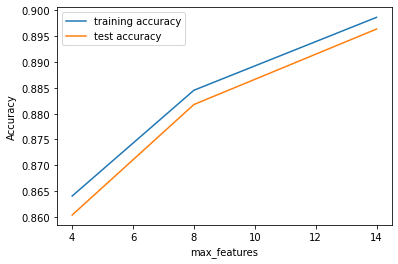

In [43]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_leaf

In [44]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [45]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.902134,0.201747,0.070826,0.010935,100,{'min_samples_leaf': 100},0.865415,0.865415,0.865415,0.870042,...,0.865491,0.002807,1,0.870337,0.868641,0.869684,0.865136,0.866310,0.868022,0.001988
1,1.623527,0.034036,0.058602,0.008147,150,{'min_samples_leaf': 150},0.849765,0.846114,0.846114,0.859603,...,0.849839,0.005062,2,0.852726,0.847900,0.847900,0.857441,0.849485,0.851090,0.003632
2,1.478487,0.039946,0.057476,0.007203,200,{'min_samples_leaf': 200},0.830986,0.829943,0.824726,0.825678,...,0.827507,0.002483,3,0.834986,0.830420,0.826115,0.824312,0.826008,0.828368,0.003876
3,1.366125,0.026172,0.055391,0.006490,250,{'min_samples_leaf': 250},0.823161,0.823161,0.822640,0.823069,...,0.823020,0.000195,4,0.822985,0.822985,0.823115,0.823008,0.823008,0.823020,0.000049
4,1.217365,0.040755,0.054161,0.008153,300,{'min_samples_leaf': 300},0.823161,0.823161,0.822640,0.823069,...,0.823020,0.000195,4,0.822985,0.822985,0.823115,0.823008,0.823008,0.823020,0.000049


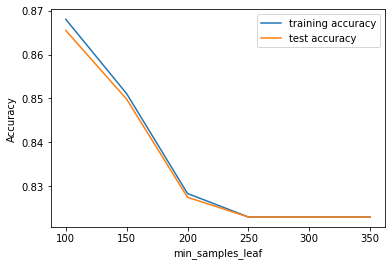

In [46]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_split

In [47]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.101634,0.065604,0.065377,0.003448,200,{'min_samples_split': 200},0.891497,0.901408,0.889411,0.897704,...,0.893561,0.005169,1,0.900078,0.902035,0.901252,0.894874,0.899439,0.899536,0.002499
1,2.212503,0.230443,0.062153,0.010123,250,{'min_samples_split': 250},0.881586,0.881064,0.884194,0.889875,...,0.883857,0.003192,2,0.889121,0.883512,0.892643,0.887831,0.889787,0.888579,0.002984
2,2.191474,0.237318,0.068775,0.010976,300,{'min_samples_split': 300},0.880021,0.873239,0.878978,0.876305,...,0.875195,0.004537,3,0.884686,0.878555,0.884947,0.874005,0.872701,0.878979,0.005148
3,1.879853,0.034832,0.063743,0.013778,350,{'min_samples_split': 350},0.862806,0.866458,0.870110,0.866388,...,0.865491,0.002991,4,0.869945,0.871511,0.877120,0.866049,0.866310,0.870187,0.004050
4,1.784743,0.037425,0.057791,0.002765,400,{'min_samples_split': 400},0.868023,0.860198,0.857068,0.872651,...,0.862987,0.006285,5,0.871250,0.861597,0.862379,0.868267,0.859137,0.864526,0.004504


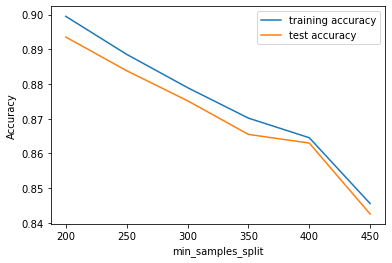

In [49]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grid Search to Find Optimal Hyperparameters

In [50]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [51]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [52]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8916836112572838 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


Fitting the final model with the best parameters obtained from grid search.

In [53]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [54]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
# predict
predictions = rfc.predict(X_test)

In [56]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       609
           1       0.00      0.00      0.00       107
           2       0.90      1.00      0.95      3391

    accuracy                           0.91      4107
   macro avg       0.63      0.51      0.55      4107
weighted avg       0.89      0.91      0.89      4107



In [58]:
print(confusion_matrix(y_test,predictions))

[[ 331    0  278]
 [   0    0  107]
 [   1    0 3390]]
